In [ ]:
from generators import LXM, GCL
from matplotlib import pyplot as plt
import seaborn as sns; sns.set()
import numpy as np
from math import pi,sqrt

from scipy.stats import chi2, norm, anderson, shapiro

from particulas import simular, animacion
from matplotlib import patches as mpatches

# **Trabajo Práctico N°1**

El presente trabajo práctico fue realizado por los alumnos:

*   Anarella Nicoletta (Padrón 94551)
*   Bruno Grassano (Padrón 103855)
*   Ignacio Javier Mermet (Padrón 98153)
*   Joaquin Gomez (Padrón 103735)


# Ejercicio 1

Sobre el generador de números al azar propuesto en el [paper asignado](https://drive.google.com/file/d/196pKnZFBc_sG6ceFNk64q8vn6BdQiwPx/view), se pide:
- Implementarlo en función de lo especificado en el documento.
- Modificarlo (si aplica) para obtener números al azar entre 0 y 1
- Realizar los gráficos que considere adecuados para mostrar las distribuciones de números al azar generados en ambos casos.

La implementación de los generadores se puede ver en el módulo `generators.py`. En este notebook resolveremos el último punto.

Se espera que los números generados estén justamente uniformemente distribuidos.

In [ ]:
def ejercicio1(generador):
    n_numeros = 100_000
    n_bins = 100

    xn = generador.generar_vector(n_numeros)

    plt.figure(figsize=(8, 5), dpi=125)
    plt.hist(xn, bins=n_bins, alpha=0.7, label="Numeros generados")
    plt.title("Histograma de los numeros generados con el generador del ejercicio 1")
    plt.xlabel("Número generado")
    plt.ylabel("Cantidad")

    plt.axhline(
        y=n_numeros / n_bins,
        xmin=0,
        xmax=1,
        color="r",
        linestyle="--",
        label="Distribucion esperada",
    )

    plt.xlim(left=0, right=1)
    plt.ylim(top=(n_numeros / n_bins) * 1.4)
    plt.legend()

    plt.show()


In [ ]:

ejercicio1(LXM())

Viendo el gráfico podemos ver que parece que se cumple, para analizar esto con más detalle vemos los tests.

## Ejercicio 2
Para cada una de las 2 versiones del generador implementado en el ejercicio 1:


*    Proponer, y realizar, al menos 2 tests para evaluar su comportamiento.

*    Evaluar e interpretar los resultados de cada uno para distintos tamaños de muestras.




In [ ]:
def ejercicio2TestGap(generador):
  cantidadGaps = 100000
  gaps = []
  gapB = 0.5
  gapA = 0.2
  pE = gapB - gapA #probabilidad de caer en el gap

  a = -1
  #genero valores hasta que el primero cae en el gap
  while (not (0.2 < a <= 0.5)):
      a = generador.generar()

  #Genero una deteminada cantidad de gaps
  contGap = 0
  cont = 0

  while (cont < cantidadGaps):
      if (0.2 < a <= 0.5):
          gaps.append(contGap)
          contGap = 0
          cont += 1
      else:
          contGap += 1

      a = generador.generar()

      
  auxFrec = np.array(gaps)
  maxFrec = np.amax(auxFrec)
  frec = np.zeros(maxFrec + 1)    

  #Genero array con las frecuencias de los gaps 
  for v in gaps:
      frec[v] += 1


  plt.hist(gaps, color="g", bins="sturges", alpha=0.9, density=True)

  #Se calcula el estadístico
  D2 = 0
  tamGap = 0
  for fr in frec:
      D2 += ((fr - (pE*(1-pE)**tamGap)*cantidadGaps)**2)/((pE*(1-pE)**tamGap)*cantidadGaps)
      tamGap += 1

  limiteSuperior = chi2.ppf(0.95, df=maxFrec)

  print("Estadistico: {:.2f} ".format(D2))
  print("límit superior: {:.2f} ".format(limiteSuperior))
  if D2 <= limiteSuperior:
      print("El test acepta la hipotesis nula.")
  else:
      print("El test rechaza la hipótesis nula")

  plt.show()


In [ ]:

ejercicio2TestGap(LXM())

Se propone un test general chi2 partiendo el intervalo [0,1] en 10 clases y usando alfa=0.01


In [ ]:
def ejercicio2TestChi2(generador):
  N = 100000
  valores = generador.generar_vector(cantidad = N)

  k = 10 #cantidad de clases
  frecuencias = []
  frecuencias.append(valores[(valores < 0.1)].size)
  for i in np.arange(0.1, 0.8, 0.1):
    frecuencias.append(valores[(valores > i) & (valores < i+0.1)].size)
  frecuencias.append(valores[(valores > 0.9)].size)
  print("Frecuencias: ", frecuencias)

  D2 = sum([(fO - 1/5*N)**2 for fO in frecuencias])/(1/5*N)
  limiteSuperior = chi2.ppf(0.99, df=4)

  print("Estadistico: {:.2f} ".format(D2))
  print("Limite superior: {:.2f} ".format(limiteSuperior))
  if D2 <= limiteSuperior:
     print("El test acepta la hipotesis nula.")
  else:
    print("El test rechaza la hipótesis nula")


In [ ]:

ejercicio2TestChi2(LXM())

Como se puede observar en la ejecución de este test, se rechaza la hipótesis nula.

Para finalizar, haremos tests espectrales para visualizar si existen patrones en los numeros generados

In [ ]:
def ejercicio2TestEspectralvisualizacion2D(generador):
    N=10000
    valores = generador.generar_vector(cantidad = N)

    matriz = np.reshape(valores, (-1, 2)) 
    print("Dimensiones (filas,cols) = {0}".format(matriz.shape))

    x, y = matriz.T
    plt.figure(figsize=(12, 10), dpi=90)
    plt.title('Test espectral', size=15)
    plt.scatter(x, y)
    plt.show()


In [ ]:

ejercicio2TestEspectralvisualizacion2D(LXM())

Se puede visualizar que no hay patrones ni en el centro de la imagen ni sobre las esquinas. Nos fijamos en 3 dimensiones para corroborar

In [ ]:
def ejercicio2TestEspectralvisualizacion3D(generador):
    #from mpl_toolkits.mplot3d import Axes3D 
    N=10002
    valores = generador.generar_vector(cantidad = N)

    matriz = np.reshape(valores, (-1, 3)) 
    print("Dimensiones (filas,cols) = {0}".format(matriz.shape))

    x, y, z = matriz.T

    fig = plt.figure(figsize=(12, 10), dpi=90) 
    plt.title('Test espectral', size=15)
    ax = fig.add_subplot(projection='3d')
    ax.scatter(x, y, z)
    plt.show()


In [ ]:

ejercicio2TestEspectralvisualizacion3D(LXM())

Podemos confirmar que tampoco se observan patrones en 3 dimensiones.

# **Ejercicio 3**

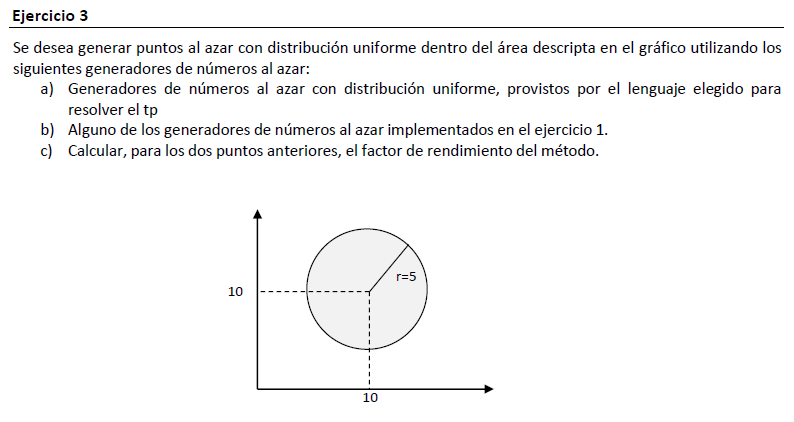

En primer lugar utilizaremos el generador de números al azar con distribución uniforme, provisto por la librería numpy del lenguaje Python.

In [ ]:
MAX_RANGO = 10
N_ITERACION = 10000

# Funcion circulo
def fcv(x,y):
  return ((x - 10)**2 + (y - 10)**2 <= 25 )

def factor_de_rendimiento(validos, n_iter):
  print("Factor de rendimiento: {}/{} ({:.2f}%)\n".format(validos, n_iter, (validos/n_iter)*100))

def get_results(n_iter):
    x = [5+x*MAX_RANGO for x in np.random.rand(n_iter)]
    y = [5+y*MAX_RANGO for y in np.random.rand(n_iter)]
    X = []
    Y = []

    for i in range(n_iter):
        if fcv(x[i], y[i]):
            X.append(x[i])
            Y.append(y[i])

    factor_de_rendimiento(len(X), n_iter)
    return X, Y

In [ ]:
plt.figure(1)
plt.figure(figsize=(13, 13))

x = np.linspace(0, 20, 100)
y = np.linspace(0, 20, 100)
X, Y = np.meshgrid(x,y)
F = (X-10)**2 + (Y-10)**2 - 25
plt.contour(X,Y,F,[0])

plt.figure(2)
X, Y = get_results(N_ITERACION)
plt.scatter(X, Y, s=10)
plt.grid('on')
plt.ylim( (0, 20) ) 
plt.xlim( (0, 20) )

left, bottom, width, height = (5, 5, 10, 10)
rect=mpatches.Rectangle((left,bottom),width,height, 
                        fill=False,
                        color="grey",
                       linewidth=3)
plt.gca().add_patch(rect)
plt.show()

El alto rendimiento de este método se debe principalmente a la selección de los límites del sector donde se generan los puntos aleatorios.

A continuación repetiremos el procedimiento, pero esta vez usando el generador de números al azar implementado en el ejercicio 1.

In [ ]:
def get_results_Modificado(n_iter, generador):

    x = [5+x*MAX_RANGO for x in generador.generar_vector(n_iter)]
    y = [5+y*MAX_RANGO for y in generador.generar_vector(n_iter)]
    X = []
    Y = []

    for i in range(n_iter):
        if fcv(x[i], y[i]):
            X.append(x[i])
            Y.append(y[i])

    factor_de_rendimiento(len(X), n_iter)
    return X, Y

In [ ]:
def ejercicio3(generador):
    plt.figure(1)
    plt.figure(figsize=(13, 13))

    x = np.linspace(0, 20, 100)
    y = np.linspace(0, 20, 100)
    X, Y = np.meshgrid(x,y)
    F = (X-10)**2 + (Y-10)**2 - 25
    plt.contour(X,Y,F,[0])

    plt.figure(2)
    X, Y = get_results_Modificado(N_ITERACION, generador)
    plt.scatter(X, Y, s=10)
    plt.grid('on')
    plt.ylim( (0, 20) ) 
    plt.xlim( (0, 20) )

    left, bottom, width, height = (5, 5, 10, 10)
    rect=mpatches.Rectangle((left,bottom),width,height, 
                            fill=False,
                            color="grey",
                        linewidth=3)
    plt.gca().add_patch(rect)
    plt.show()


In [ ]:

ejercicio3(LXM())

Los resultados son muy similares a los obtenidos previamente.

# **Ejercicio 4**

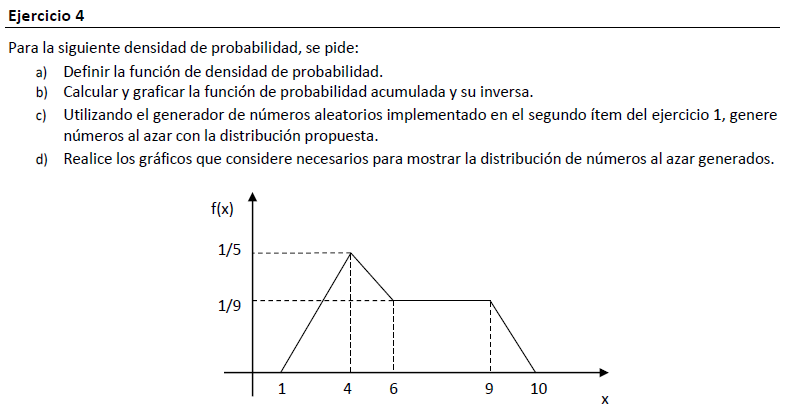

Definimos la función de densidad de probabilidad asociada a la gráfica del enunciado como

$$
f(x) = \left\{
    \begin{array}\\
        \frac{1}{15}\ x - \frac{1}{15} & \mbox{si } \ 1\leq x<4\\
        -\frac{2}{45}\ x + \frac{17}{45} & \mbox{si } \ 4\leq x<6\\
        \frac{1}{9}\ & \mbox{si } \ 6\leq x<9\\
        -\frac{1}{9}\ x + \frac{10}{9} & \mbox{si } \ 9\leq x<10\\
        0 & \mbox{en cualquier otro caso}
    \end{array}
    \right.
$$

Verificamos que se trata de una función de densidad de probabilidad válida.

$$\int_{1}^{10} f(x)dx = \int_{1}^{4} (\frac{1}{15}\ x - \frac{1}{15} ) dx + \int_{4}^{6} (-\frac{2}{45}\ x + \frac{17}{45} ) dx + \int_{6}^{9} \frac{1}{9}\  dx + \int_{9}^{10} (-\frac{1}{9}\ x + \frac{10}{9} ) dx$$

$$= \frac{1}{15}\ \int_{1}^{4} (x - 1) dx + \frac{1}{45}\ \int_{4}^{6} (-2 x + 17) dx + \int_{6}^{9} \frac{1}{9}\  dx + \frac{1}{9}\ \int_{9}^{10} (-x + 10) dx$$

$$= \frac{1}{15}\ (\frac{x^2}{2}\ -x) \Big|_1^4\ + \frac{1}{45}\ (-x^2+17x) \Big|_4^6\ + \frac{1}{9}\ (x) \Big|_6^9\ + \frac{1}{9}\ (-\frac{x^2}{2}\ +10x) \Big|_9^{10}$$

$$= \frac{1}{15}\ * \frac{9}{2}\ + \frac{1}{45}\ *14 + \frac{1}{3}\ + \frac{1}{9}\ *\frac{1}{2}$$

$$\int_{1}^{10} f(x)dx = 1$$

Procedemos a calcular la función de probabilidad acumulada para la variable aleatoria X. Para ello integramos  $f(x)$ en los distintos intervalos.

$$\int_{1}^{x} (\frac{1}{15}\ t - \frac{1}{15} ) dt=\frac{1}{15}\ (\frac{t^2}{2}\ -t) \Big|_1^x\ =\frac{1}{15}\ (\frac{x^2}{2}\ -x-\frac{1}{2}\ +1)=\frac{1}{15}\ (\frac{x^2}{2}\ -x+\frac{1}{2}\ )$$

$$\int_{4}^{x} (-\frac{2}{45}\ t + \frac{17}{45} ) dt+\frac{3}{10}=\frac{1}{45}\ (-t^2+17t) \Big|_4^x\ +\frac{3}{10}=\frac{1}{45}\ (-x^2+17x+4^2-17*4)+\frac{3}{10}=\frac{1}{45}\ (-x^2+17x-52)+\frac{3}{10}$$

$$\int_{6}^{x} (\frac{1}{9}) dt+\frac{11}{18}=\frac{1}{9}\ (t) \Big|_6^x\ +\frac{11}{18}=\frac{1}{9}\ (x-6)+\frac{11}{18}$$

$$\int_{9}^{x} (-\frac{1}{9}\ t + \frac{10}{9}) dt+\frac{17}{18}=\frac{1}{9}\ (-\frac{t^2}{2}\ +10t) \Big|_9^{x}+\frac{17}{18}=\frac{1}{9}\ (-\frac{x^2}{2}\ +10x+\frac{81}{2}\ -90) +\frac{17}{18}$$

$$
F_X(x) = \left\{
    \begin{array}\\
        0 & \mbox{si } \ x<1\\
        \frac{1}{30}\ x^2 -\frac{1}{15}\ x+\frac{1}{30}\ & \mbox{si } \ 1\leq x<4\\
        -\frac{1}{45}\ x^2+\frac{17}{45}\ x-\frac{77}{90} & \mbox{si } \ 4\leq x<6\\
        \frac{1}{9}\ x-\frac{1}{18}\ & \mbox{si } \ 6\leq x<9\\
        -\frac{1}{18}\ x^2 +\frac{10}{9}\ x-\frac{41}{9}\ & \mbox{si } \ 9\leq x<10\\
        1 & \mbox{si } \ 10\leq x
    \end{array}
    \right.
$$

In [ ]:
def F_X(x):
    if x < 1:
        return 0
    elif x >= 1 and x < 4:
        return 1/30 * x**2 - 1/15 * x + 1/30
    elif x >= 4 and x < 6:
        return - 1/45 * x**2 + 17/45 * x - 77/90
    elif x >= 6 and x < 9:
        return 1/9 * x - 1/18
    elif x >= 9 and x < 10:
        return -1/18 * x**2 + 10/9 * x - 41/9
    elif x >= 10:
        return 1
    else:
        print("La función no está definida para {0}".format(x))
        raise NotImplementedError

In [ ]:
x = np.linspace(0 ,11, 100)
y = [F_X(i) for i in x]

fig = plt.figure(figsize=(12, 6))
ax = fig.add_subplot(1, 1, 1)
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
plt.plot(x, y, color='#087E8B', linewidth=3.0)
plt.title("Función de probabilidad acumulada de X",size=15)
plt.xlabel('x', size=15)
plt.ylabel('F(x)', size=15)
plt.show()

Para invertir $F_X(x)$ conviene expresar cada uno de los tramos cuadráticos utilizando la expresión canónica.

$$
F_X(x) = \left\{
    \begin{array}\\
        0 & \mbox{si } \ x<1\\
        \frac{1}{30}\ (x-1)^2 & \mbox{si } \ 1\leq x<4\\
        -\frac{1}{45}\ (x-\frac{17}{2}\ )^2+\frac{3}{4} & \mbox{si } \ 4\leq x<6\\
        \frac{1}{9}\ x-\frac{1}{18}\ & \mbox{si } \ 6\leq x<9\\
        -\frac{1}{18}\ (x-10)^2 +\frac{10}{9}\ x-\frac{41}{9}\ & \mbox{si } \ 9\leq x<10\\
        1 & \mbox{si } \ 10\leq x
    \end{array}
    \right.
$$

$$
F^{-1}_X(u) = \left\{
    \begin{array}\\
        1 + \sqrt{30u} & \mbox{si } \ 0\leq u<\frac{3}{10}\\
        \frac{17}{2}\ - \sqrt{-45u + \frac{135}{4}\ } & \mbox{si } \ \frac{3}{10}\ \leq u<\frac{11}{18}\\
        9u+\frac{1}{2}\ & \mbox{si } \ \frac{11}{18}\ \leq u<\frac{17}{18}\\
        10-\sqrt{-18(u-1)} & \mbox{si } \ \frac{17}{18}\ \leq u\leq1
    \end{array}
    \right.
$$

In [ ]:
def F_X_inversa(u):
    if u >= 0 and u < 3/10:
        return 1 + sqrt(30*u)
    elif u >= 3/10 and u < 11/18:
        return 17/2 - sqrt(-45 * u + 135/4)
    elif u >= 11/18 and u < 17/18:
        return 9 * u +1/2
    elif u >= 17/18 and u <= 1:
        return 10 - sqrt(-18*u+18)
    else:
        print("La función no está definida para {0}".format(u))
        raise NotImplementedError

In [ ]:
x = np.linspace(0 ,1, 100)
y = [F_X_inversa(i) for i in x]

fig = plt.figure(figsize=(12, 6))
ax = fig.add_subplot(1, 1, 1)
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
plt.title("Inversa de función de probabilidad acumulada de X",size=15)
plt.plot(x, y, color='#087E8B', linewidth=3.0)
plt.xlabel('u', size=15)
plt.ylabel('F-1(u)', size=15)
plt.show()

Utilizando la función inversa, vamos a generar números aleatorios que respeten la distribución analizada. Como generador de números aleatorios con densidad uniforme tendremos el LXM que desarrollamos en el ejercicio 1. Y es justamente a esa muestra de números aleatorios que le vamos a aplicar la función inversa acumulativa.

In [ ]:
def ejercicio4(generador):
    for N in [100, 1000, 10000]:
        u = generador.generar_vector(N)
        x = [F_X_inversa(ui) for ui in u]

        plt.figure(figsize=(12, 8), dpi=80)
        plt.title('Generación de N={0} números al azar con densidad de distribución f(x)'.format(N), size=20)
        plt.xlabel('Bins', size=15)
        plt.ylabel('Cantidad de ocurrencias', size=15)

        plt.hist(x, bins='sturges', color='#264653')
        plt.show()


In [ ]:

ejercicio4(LXM())

# Ejercicio 5
Utilizando el generador implementado en el ejercicio 1:
* Implementar un método para generar variables aleatorias con distribución normal con media 15 y desvío 3.
* Graficar la distribución que siguen los números pseudo aleatorios generados.
* Realizar, al menos, 2 tests de los explicados en la materia para verificar si los números generados siguen la distribución pedida (evalué los resultados para distintos tamaños de muestra).

Empezamos implementando el método para generar las variables aleatorias. Para obtener la normal usamos el método de aceptación-rechazo, es decir, si se obtiene un valor dentro del area esperada, es aceptado, sino, se rechaza.

Una particularidad a tener en cuenta, es que no se puede generar una normal entera debido al rango de la exponencial, por lo que según un nuevo valor random obtenido determinamos de que lado de la normal iría.

In [ ]:
def fY(y):
    return np.exp(-y)

def fX(x):
    return np.exp(-x**2 / 2) / np.sqrt(2 * pi)


def probabilidadAceptar(t, c):
    return fX(t) / (c * fY(t))

def funcionNormal(media, desvio, N, generador):    
    c = np.sqrt(2 * np.exp(1) / pi)
    tExponenciales = np.random.exponential(size = N) 
    
    zNormal = []
    for i in range(N):
        uniforme = generador.generar()
        if uniforme < probabilidadAceptar(tExponenciales[i],c):
            probabilidadSigno = generador.generar()
            if probabilidadSigno < 0.5:
                zNormal.append( tExponenciales[i] * desvio + media)
            else:
                zNormal.append( - tExponenciales[i] * desvio + media)


    return zNormal


In [ ]:

vNormal = funcionNormal(15,3,100000, LXM())

In [ ]:
plt.hist( vNormal, 'sturges')
plt.title('Histograma de Normal')
plt.xlabel('X')
plt.show()

print('Media: ', np.mean(vNormal))
print('Desvio: ', np.std(vNormal))

Podemos ver que los valores obtenidos de media y desvio son cercanos a los buscados.

Vemos de realizar los tests para ver si se sigue la distribución pedida.

Probamos primero aplicando el test de Kolmogorov Smirnov. Este test compara dos distribuciones de probabilidad acumulada, una se asigna a la hipótesis nula y la otra es generada de forma empírica.

Como nivel de significación $\alpha$ vamos a usar 0,05



In [ ]:
def Kaceptacion(N):
  return np.sqrt( -1 * np.log(0.05/2) / (2*N) )


def kolmogorovSmirnov(muestra, Kaceptacion):
    kMayor = 0
    kMenor = 0
    i = 1
    n = len(muestra)
    for x in sorted(muestra):
        valorTeorico = norm.cdf(x, loc=15, scale=3)

        kMayor = max(kMayor, (i / n - valorTeorico))
        kMenor = max(kMenor, (valorTeorico - (i -1) / n))
        i += 1

    kMayor = sqrt(n) * kMayor
    kMenor = sqrt(n) * kMenor
    k = max(kMayor, kMenor)
    print("K obtenido = {0}".format(k))
    print("K aceptación = {0}".format(Kaceptacion))
    if  k <= Kaceptacion:
        print('Acepto H0')
    else:
        print('Rechazo H0')



Probamos el test para distintas muestras.

In [ ]:
def ejercicio5TestKolmogorovSmirnov(generador):
    for muestras in {1000, 10000, 100000}:
        print("Muestras: {0}".format(muestras))
        vNormal = funcionNormal(15,3,muestras, generador)
        kolmogorovSmirnov(vNormal,Kaceptacion(len(vNormal)))
        print("------")


In [ ]:

ejercicio5TestKolmogorovSmirnov(LXM())

In [ ]:
def andersonTest(vNormal):
  estadistico, valoresCriticos, nivelDeSignificancia  = anderson(vNormal)

  print("Estadístico: %.3f" % estadistico)

  for i in range(len(valoresCriticos)):
    print("Nivel de significancia: %.3f -- Umbral: %.3f" % (nivelDeSignificancia[i] / 100, valoresCriticos[i]))
    if estadistico < valoresCriticos[i]:
      print("Los datos son normales, no se puede rechazar H0")
    else:
      print("Los datos no son normales, se rechaza H0")

In [ ]:
def ejercicio5TestAnderson(generador):
  for muestras in {1000,10000,100000}:
    print("Muestras: {0}".format(muestras))
    v_normal = funcionNormal(15,3,muestras,generador)
    andersonTest(v_normal)
    print("------")
    


In [ ]:
ejercicio5TestAnderson(LXM())
  

Se puede ver que la salida indica que los datos siguen una distribución normal.

Vemos ahora con el test de Shapiro Wilk. Este test determina la normalidad de los datos.

* $H_0$: La muestra sigue la distribución probada.
* $H_1$: La muestra no sigue la distribución probada.

In [ ]:
def shapiroWilkTest(vNormal, nivelSignificacion):
  estadistico, pValor = shapiro(vNormal)

  print("Estadístico: %.3f" % estadistico)
  print("p valor: %.6f" % pValor)
  if pValor < nivelSignificacion:
    print("Los datos no son normales, se rechaza H0")
  else:
    print("No se puede rechazar H0")

In [ ]:
def ejercicio5TestShapiroWilk(generador):
    for muestras in {1000,10000,100000}:
        print("Muestras: {0}".format(muestras))
        vNormal = funcionNormal(0,1,muestras,generador)
        shapiroWilkTest(vNormal, 0.05)
        print("------")


In [ ]:

ejercicio5TestShapiroWilk(LXM())

Podemos ver que los datos siguen la distribución normal.

# Ejercicio 6

Se propone simular el desplazamiento de partículas sobre un plano utilizando un modelo basado en agentes, en
el cual el desplazamiento se modela como random walking.
Se considera una población de N partículas (utilizar distintos valor de N) distribuidos uniformemente sobre un
área que se puede discretizar como una grilla de de 100 x 100.
Considerar:
* El movimiento de las partículas es equiprobable en las direcciones permitidas. En zonas distintas a los bordes, este movimiento será posible en 4 direcciones.
* En los límites de la zona planteada, las partículas sólo pueden moverse en las direcciones permitidas.
* Si más de una partícula, en el mismo instante de tiempo, intenta ocupar la misma posición, sólo una de ellas la ocupará, y el resto deberá volver a elegir dirección de desplazamiento. Si luego de 2 intentos consecutivos por moverse, la partícula no logra hacerlo, mantiene su lugar durante ese instante de tiempo.
* El orden en el cual se mueven las partículas debe elegirse al azar, en cada instante de tiempo, siguiendo una distribución uniforme.
* Existen los siguientes tipos de partículas, las cuales no reaccionan entre sí.

| Tipo         | %     | Características |
|--------------|-----------|------------|
| A            | 70    | 1 celda por instante de tiempo       |
| B            | 25    | 1 celda cada 2 instantes de tiempo       |
| C            | 5     | 1 cada cada 4 instantes de tiempo       |

Se pide:
* Utilizar el generador de números al azar implementado en el ejercicio 1.
* Una animación de la situación planteada
* Dividir el área en 2 zonas de igual dimensión, y graficar la evolución de la densidad de partículas de cada tipo en cada una de ellas.

In [ ]:
snapshots_path, caminantes = simular(caminantes=500, iteraciones=50)
animacion(snapshots_path, caminantes)

In [ ]:
snapshots_path, caminantes = simular(caminantes=1000, iteraciones=250)
animacion(snapshots_path, caminantes)

In [ ]:
snapshots_path, caminantes = simular(caminantes=2500, iteraciones=500)
animacion(snapshots_path, caminantes)

# Ejercicio opcional

Comparar los resultados obtenidos en los ejercicios 1 a 5 utilizando el generador de números al azar propuesto en el paper
asignado, con los resultados que se obtendrían con un Generador Congruencial Lineal de módulo 2^32, multiplicador
1013904223, incremento de 1664525 y semilla igual a la parte entera del promedio de los números de padrón de los
integrantes del grupo.

## Ejercicio 1

In [ ]:
ejercicio1(GCL())

## Ejercicio 2

In [ ]:
ejercicio2TestGap(GCL())

In [ ]:
ejercicio2TestChi2(GCL())

In [ ]:
ejercicio2TestEspectralvisualizacion2D(GCL())

In [ ]:
ejercicio2TestEspectralvisualizacion3D(GCL())

En el ejercicio 1, se puede ver que se distribuye de forma uniforme y los tests del ejercicio 2 nos permiten confirmarlo. La unica diferencia con el generador LXM se encuentra en el resultado del test de gap

## Ejercicio 3

In [ ]:
ejercicio3(GCL())

Se puede observar que se genera con un rendimiento muy similar al de LXM. La diferencia es de menos del 1% en el rendimiento


## Ejercicio 4

In [ ]:
ejercicio4(GCL())

En este ejercicio, los histogramas se ven bastante similares salvo en el caso de N=100

## Ejercicio 5

In [ ]:
ejercicio5TestKolmogorovSmirnov(GCL())

Para el test de Kolmogorov, no se ven diferencias


In [ ]:
ejercicio5TestAnderson(GCL())

En el test de anderson, existen diferencias en casos puntuales en los cuales LXM no puede rechazar H0 como ocurre con 1000 muestras o con un umbral bajo

In [ ]:
ejercicio5TestShapiroWilk(GCL())

Para el test de ShapiroWilk, tampoco se ven diferencias

## Conclusión del ejercicio opcional

Se puede observar que los resultados de utilizar LXM y el generador congruencial lineal son bastante similares. Esto creemos que se debe a que LXM se basa en el generador congruencial lineal por lo tanto tiene sentido que tengan resultados parecidos.